Detected Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Found 11230 images belonging to 6 classes.


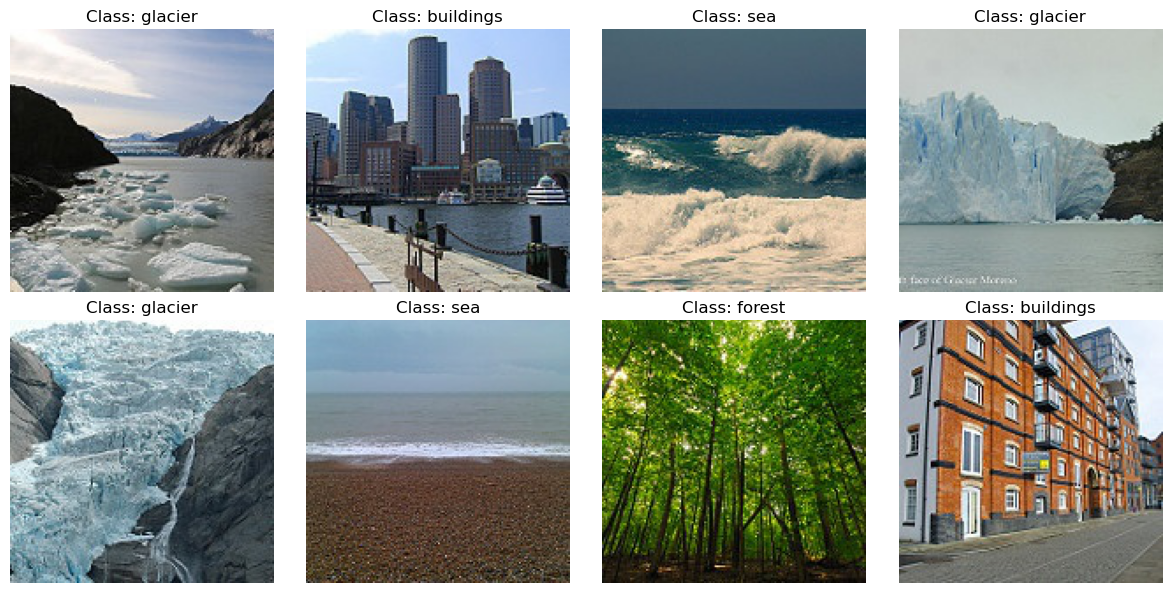

In [3]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base Directory
seg_train_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/data/seg_train/")
seg_test_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/data/seg_test/")

# Verifying classes (avoiding files like .DS_Store)
classes = sorted([folder for folder in os.listdir(seg_train_dir) if os.path.isdir(seg_train_dir / folder)])
print(f"Detected Classes: {classes}")

# Basic setup of ImageDataGenerator to preview
preview_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

preview_data = preview_gen.flow_from_directory(
    seg_train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Mapping: index → ​​class name
index_to_class = {v: k for k, v in preview_data.class_indices.items()}

# Show some images from training
images, labels = next(preview_data)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    class_index = labels[i].argmax()
    class_name = index_to_class[class_index]
    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#### 